# Linear Regression

## Bike Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


## Step 1: Read & Understand the Data

Import NumPy and Pandas and read housing dataset


In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# bike = pd.read_csv("day.csv")
# bike.head()

# from google.colab import files
# uploades = files.upload()
bike = pd.read_csv("day.csv", encoding="latin-1")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Statistics of the Bike dataframe


In [ ]:
bike.shape

(730, 16)

In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# dropping instant (record index) as it doesn't have any significance in our analysis
bike.drop("instant", axis=1, inplace=True)

In [ ]:
# dropping casual and  registered as they contribute on cnt (count of total rental bikes including both casual and registered) so there is no point keeping 3 target
bike.drop("casual", axis=1, inplace=True)
bike.drop("registered", axis=1, inplace=True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Data Visualization of Bike Dataframe

During this phase, you’ll accomplish two key tasks:

Detecting Multicollinearity: Check for any apparent multicollinearity among predictors. This is where you’ll identify if certain features are highly correlated with each othe
r.
Identifying Strong Associations: Examine whether any predictors exhibit a direct and robust relationship with the outcome variable.
To visualize our data effectively, we’ll utilize Python libraries such as matplotlib and seabornborn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric continous variables


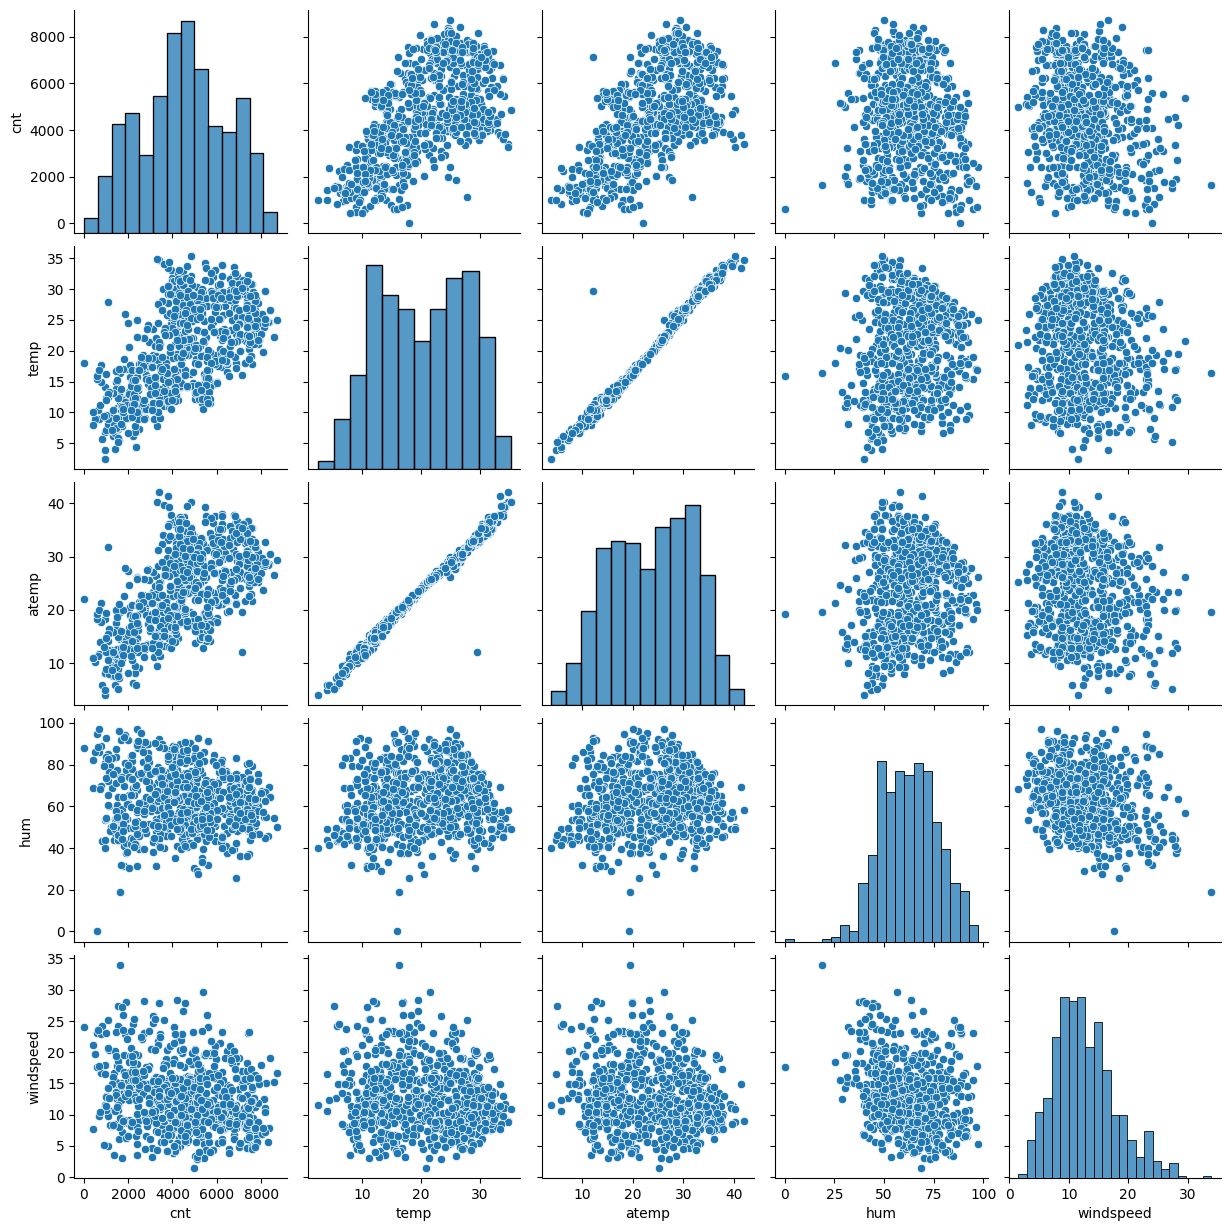

In [ ]:
sns.pairplot(bike[["cnt", "temp", "atemp", "hum", "windspeed"]])
plt.show()

Certainly! Let’s analyze the insights drawn from the information above:

Temperature and “Feels Like” Temperature (atemp): These two variables exhibit a similar distribution. Given this similarity, we recommend using “atemp” as a predictor. The rationale is that “atemp” may better reflect customer perception
s.
Linearity with Target Variable (cnt): Several other features demonstrate a linear relationship with the target variable “cnt.” This observation suggests that a linear regression model could be suitable for predicting the bike rental count.


#### Visualise Categorical Variables

Make a boxplot for some of the categorical variables.


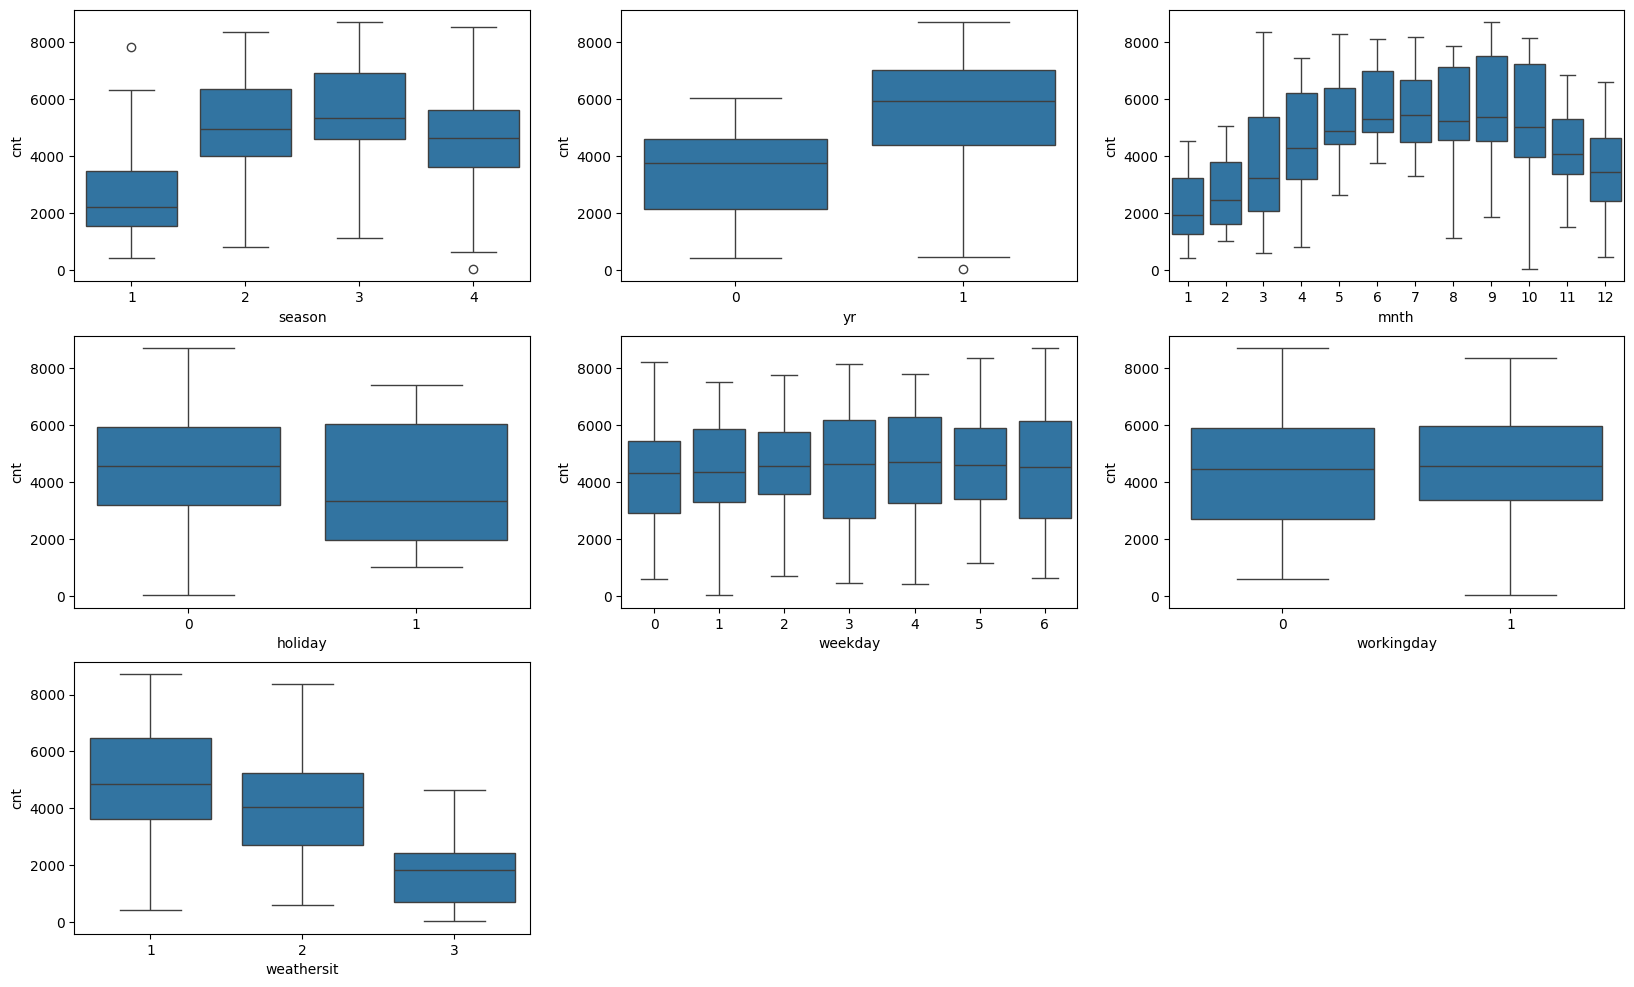

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

Let’s analyze the insights drawn from the information above:

Seasonal Demand for Bikes:
The demand for bikes is highest during the months of August, September, and October. These fall within the late summer and early autumn period.
Conversely, bike demand appears to be lower during the spring season.
Yearly Trends:
In the year 2019, there was a notable surge in bike rentals. This suggests that external factors or events during that year may have influenced bike usage.


## Step 3: Data Preparation


- The data set has only two binary column working day and year and both are already on 0/1 format so no change needed


In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# Drop dteday as it is not adding value as we don have year and month in model building
# Drop temp as actual temp is more correlated in customer decision
bike.drop("dteday", axis=1, inplace=True)
bike.drop("temp", axis=1, inplace=True)

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [ ]:
# Mapping more understandable values to categorical columns
bike["season"] = bike["season"].replace(
    {1: 'Spring', 2: "Summer", 3: "Fall", 4: "Winter"})
bike["mnth"] = bike["mnth"].replace({1: 'January', 2: "February", 3: "March", 4: "April", 5: "May",
                                    6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
bike["weekday"] = bike["weekday"].replace(
    {0: "Sunday", 1: 'Monday', 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
bike["weathersit"] = bike["weathersit"].replace(
    {1: "Clear + Partly Cloudy", 2: "Mist + Cloudy", 3: "Light Precipitation", 4: "Heavy Precipitation"})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


In [ ]:
# Mappong year column
# bike["yr"] = np.where(bike["yr"] == 0 , 2018 , 2019)
# bike.head()

In [ ]:
# Creating dummy variables for categorical variable season

season_dummy = pd.get_dummies(bike['season'], drop_first=True)

season_dummy.head()

,Spring,Summer,Winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [ ]:
# Concatenation Dummy variable to original data

bike = pd.concat([bike, season_dummy], axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985,True,False,False
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801,True,False,False
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349,True,False,False
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562,True,False,False
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600,True,False,False


In [ ]:
# Creating Dummy for month , day_of_the_week  & weather_situation column
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first=True)
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)

In [ ]:
# Concatenating to original df

bike = pd.concat([bike, mnth_dummy], axis=1)

bike = pd.concat([bike, weekday_dummy], axis=1)

bike = pd.concat([bike, weathersit_dummy], axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Precipitation,Mist + Cloudy
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,...,False,False,False,True,False,False,False,False,False,True
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,...,False,False,False,False,True,False,False,False,False,True
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,...,False,False,True,False,False,False,False,False,False,False
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,...,False,False,False,False,False,False,True,False,False,False
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    object 
 1   yr                   730 non-null    int64  
 2   mnth                 730 non-null    object 
 3   holiday              730 non-null    int64  
 4   weekday              730 non-null    object 
 5   workingday           730 non-null    int64  
 6   weathersit           730 non-null    object 
 7   atemp                730 non-null    float64
 8   hum                  730 non-null    float64
 9   windspeed            730 non-null    float64
 10  cnt                  730 non-null    int64  
 11  Spring               730 non-null    bool   
 12  Summer               730 non-null    bool   
 13  Winter               730 non-null    bool   
 14  August               730 non-null    bool   
 15  December             730 non-null    boo

In [ ]:
# Dropping original columns after dummy creation
bike.drop(["season", "mnth", "weekday", "weathersit"], inplace=True, axis=1)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Precipitation,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
bike.shape

(730, 29)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   atemp                730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   Spring               730 non-null    bool   
 8   Summer               730 non-null    bool   
 9   Winter               730 non-null    bool   
 10  August               730 non-null    bool   
 11  December             730 non-null    bool   
 12  February             730 non-null    bool   
 13  January              730 non-null    bool   
 14  July                 730 non-null    bool   
 15  June                 730 non-null    boo

## Step 4: Split the Data into Training and Testing Sets



In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(
    bike, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
df_train.shape

(510, 29)

In [ ]:
df_test.shape

(219, 29)

### Rescale the Features

Here we can see that all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Let's use MinMax scaling.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns atemp, hum, windspeed and cnt except yr and dummy
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Precipitation,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.766351,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.438975,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.200348,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.391735,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


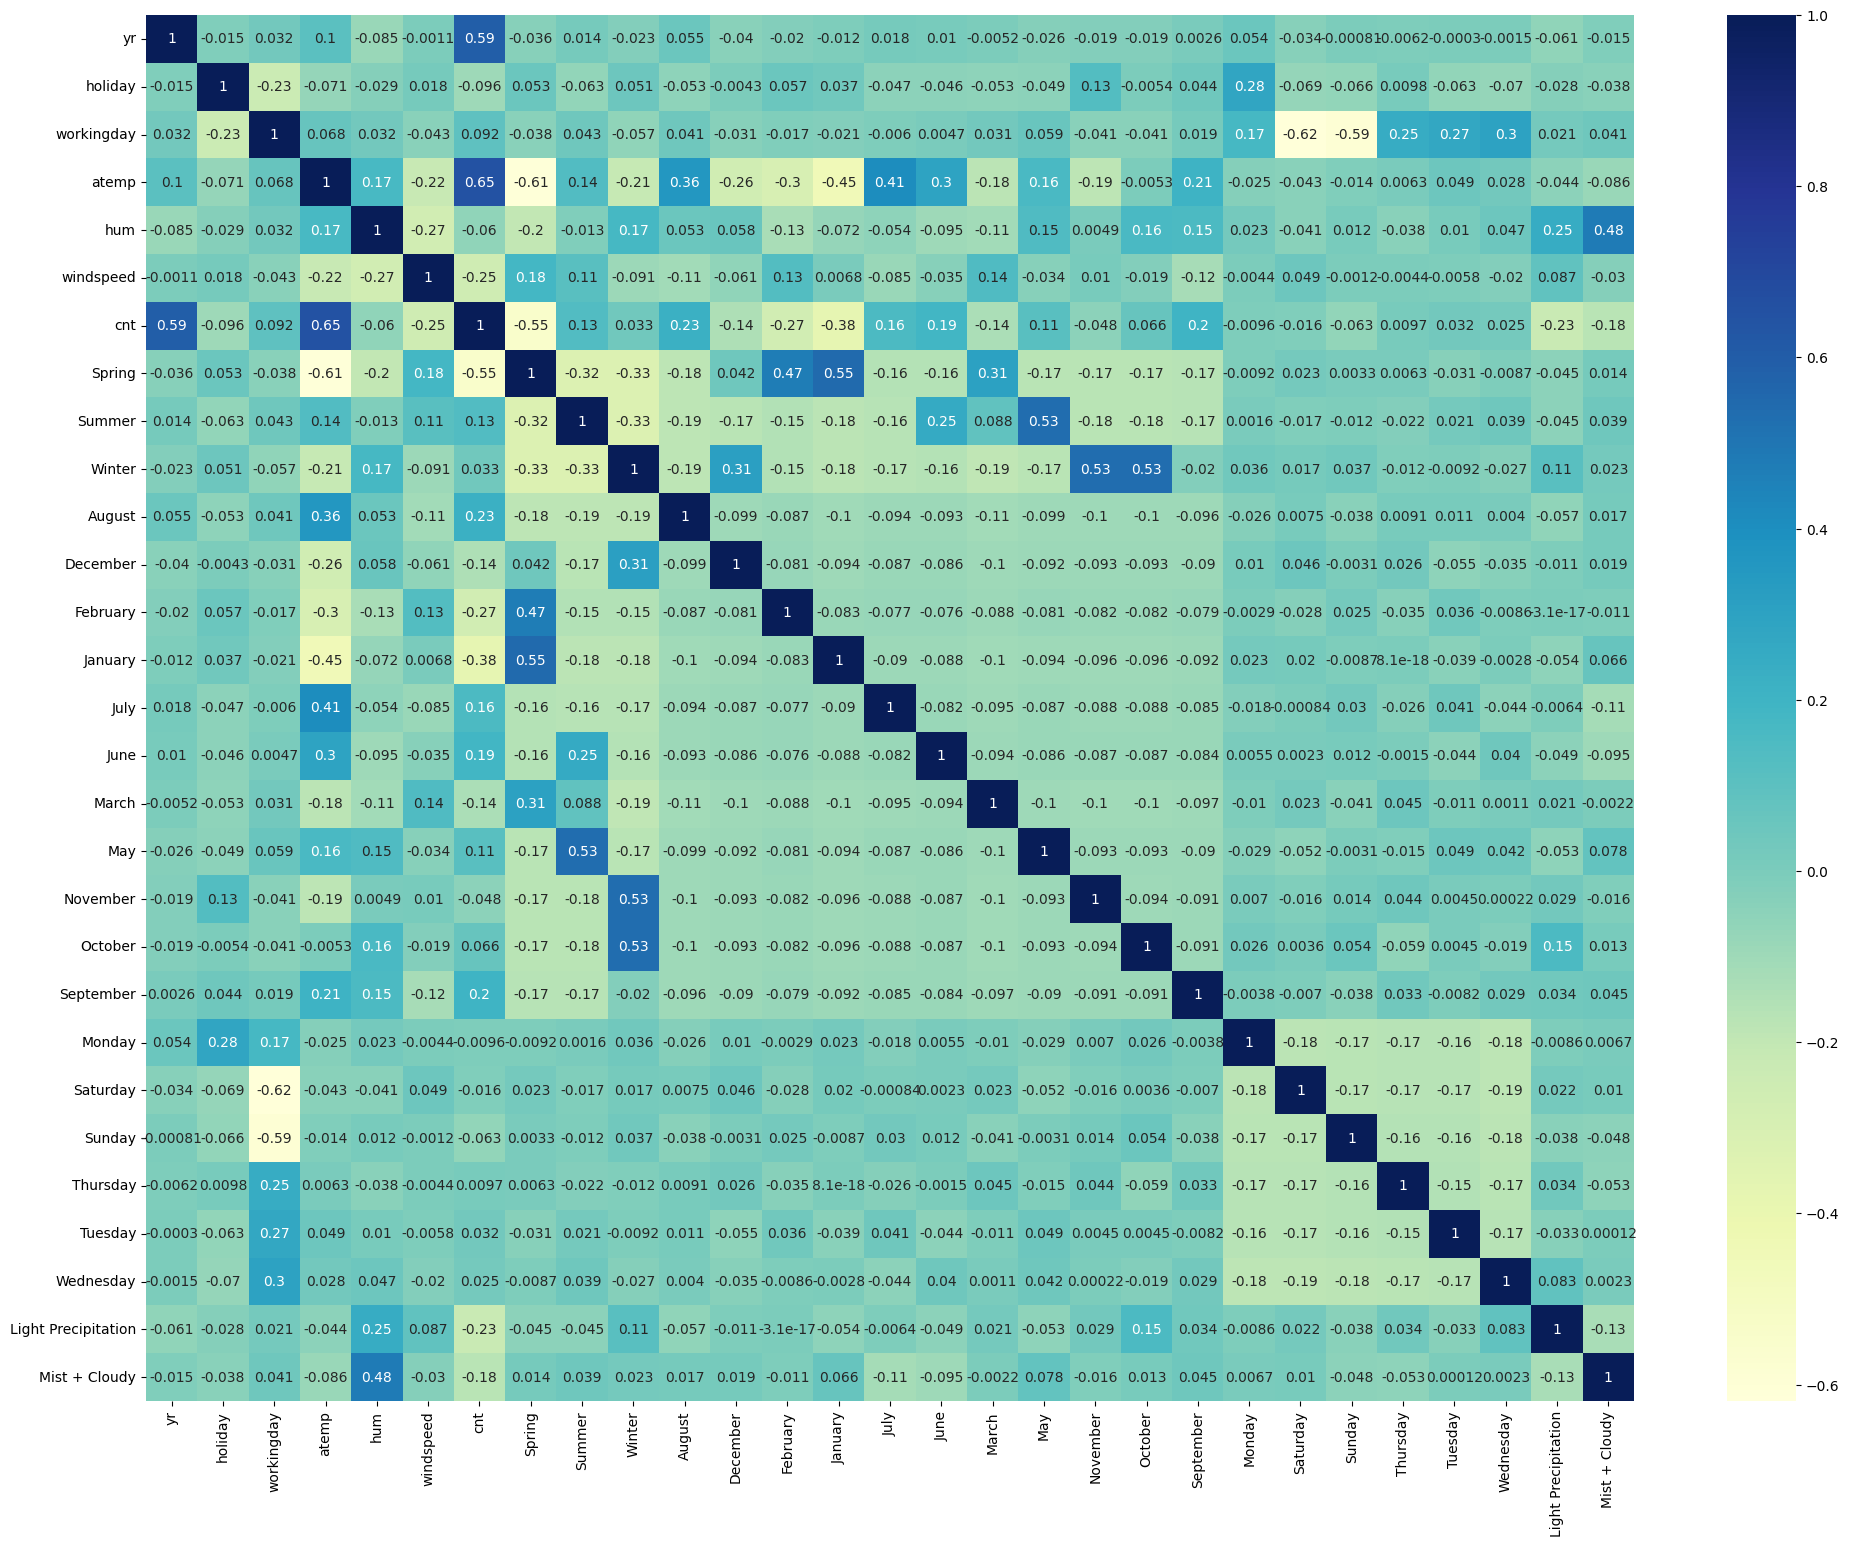

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(24, 18))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

As you might have noticed, `count` seems to the correlated to `yr` year and 'atemp' actual temprature the most.


### Dividing into X and Y sets for the model building


In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Precipitation,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.766351,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.438975,0.640189,0.255342,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.200348,0.498067,0.663106,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.391735,0.504508,0.188475,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Build linear model

### Approach

#### Follow mised approach

#### 15 Best attributes will be chosen using RFE.

#### We will eleminate the column using the p-value method.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [ ]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Check the parameters obtained

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', True, 1),
 ('August', False, 6),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 11),
 ('Light Precipitation', True, 1),
 ('Mist + Cloudy', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'January', 'July', 'September', 'Saturday', 'Sunday',
       'Light Precipitation', 'Mist + Cloudy'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Summer', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Build Linear Model with 'STATS MODEL'

### Model 1


In [ ]:
print(X_train_rfe.dtypes)

yr                       int64
holiday                  int64
workingday               int64
atemp                  float64
hum                    float64
windspeed              float64
Spring                    bool
Winter                    bool
January                   bool
July                      bool
September                 bool
Saturday                  bool
Sunday                    bool
Light Precipitation       bool
Mist + Cloudy             bool
dtype: object


In [ ]:
boolean_columns = ['Spring', 'Winter', 'January', 'July', 'September',
                   'Saturday', 'Sunday', 'Light Precipitation', 'Mist + Cloudy']

for column in boolean_columns:
    X_train_rfe[column] = X_train_rfe[column].astype(int)

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [ ]:
# # Add a constant
# X_train_lm1 = sm.add_constant(X_train_rfe)

# # Create a first fitted model
# lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [ ]:
X_train_lm1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,Spring,Winter,January,July,September,Saturday,Sunday,Light Precipitation,Mist + Cloudy
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,0,1


In [ ]:
# Check the parameters obtained

lr1.params

const                  0.253490
yr                     0.232502
holiday               -0.002506
workingday             0.096557
atemp                  0.476051
hum                   -0.144868
windspeed             -0.161522
Spring                -0.104264
Winter                 0.045799
January               -0.039818
July                  -0.069934
September              0.062586
Saturday               0.106578
Sunday                 0.052861
Light Precipitation   -0.248391
Mist + Cloudy         -0.059373
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.66e-188
Time:                        12:18:54   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2535    

### Model 2

The p-value of all variables coeffcients are significant (less than 0.05).
Check the VIF


### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(
    X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,41.67
11,Saturday,10.16
12,Sunday,9.84
3,atemp,3.11
6,Spring,2.66
1,holiday,2.57
4,hum,1.91
7,Winter,1.75
14,Mist + Cloudy,1.57
8,January,1.56


Based on the VIF 'hum' and 'atemp' is too high
we will first remove 'hum' as atemp is correlated with target value


In [ ]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   atemp                510 non-null    float64
 4   windspeed            510 non-null    float64
 5   Spring               510 non-null    int32  
 6   Winter               510 non-null    int32  
 7   January              510 non-null    int32  
 8   July                 510 non-null    int32  
 9   September            510 non-null    int32  
 10  Saturday             510 non-null    int32  
 11  Sunday               510 non-null    int32  
 12  Light Precipitation  510 non-null    int32  
 13  Mist + Cloudy        510 non-null    int32  
dtypes: float64(2), int32(9), int64(3)
memory usage: 58.0 KB


In [ ]:
# removing 'hum' variable from dataset
X_train_rfe.drop(['hum'], axis=1, inplace=True)

In [ ]:
# creating model after dropping variable

# adding constant to variable
X_train_lm2 = sm.add_constant(X_train_rfe)

# creating model using statsmodel
lm = sm.OLS(y_train, X_train_lm2)  # creating an instant
lm_model = lm.fit()  # training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.51e-186
Time:                        12:18:58   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1925      0.020      9.501      0.000       0.153       0.232
yr                      0.2360      0.008     28.815      0.000       0.220       0.252
holiday                -0.0180      0.021     -0.848      0.397      -0.060       0.024
workingday              0.0818      0.009      9.474      0.000       0.065       0.099
atemp                   0.4443      0.033     13.615      0.000       0.380       0.508
windspeed              -0.1358      0.025     -5.373      0.000      -0.185      -0.086
Spring                 -0.1071      0.015     -6.957      0.000      -0.137      -0.077
Winter                  0.0369      0.012      3.038      0.003       0.013       0.061
January                -0.0437      0.018     -2.457      0.014      -0.079      -0.009
July                   -0.0627      0.017     -3.632      0.000      -0.097      -0.029
September               0.0595      0.016      3.801      0.000       0.029       0.090
Saturday                0.0935      0.011      8.420      0.000       0.072       0.115
Sunday                  0.0353      0.011      3.124      0.002       0.013       0.057
Light Precipitation    -0.2888      0.025    -11.722      0.000      -0.337      -0.240
Mist + Cloudy          -0.0827      0.009     -9.456      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.217   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.625
Skew:                          -0.643   Prob(JB):                     1.47e-37
Kurtosis:                       5.515   Cond. No.                     3.61e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value of all variables coeffcients are significant (less than 0.05).
Check the VIF


In [ ]:
# checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(
    X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.02
1,holiday,1.93
2,workingday,25.09
3,atemp,2.92
4,windspeed,1.12
5,Spring,2.65
6,Winter,1.68
7,January,1.55
8,July,1.28
9,September,1.10


### Model 3

VIF is <5 and p value of saturday is more so drop saturday data


In [ ]:
# removing  variable from dataset as p value is more
X_train_rfe.drop(['Saturday'], axis=1, inplace=True)

# creating model after dropping variable

# adding constant to variable
X_train_lm3 = sm.add_constant(X_train_rfe)

# creating model using statsmodel
lm = sm.OLS(y_train, X_train_lm3)  # creating an instant
lm_model = lm.fit()  # training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.51e-186
Time:                        12:23:45   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2860      0.026     10.872      0.000       0.234       0.338
yr                      0.2360      0.008     28.815      0.000       0.220       0.252
holiday                -0.1115      0.028     -4.045      0.000      -0.166      -0.057
workingday             -0.0117      0.011     -1.018      0.309      -0.034       0.011
atemp                   0.4443      0.033     13.615      0.000       0.380       0.508
windspeed              -0.1358      0.025     -5.373      0.000      -0.185      -0.086
Spring                 -0.1071      0.015     -6.957      0.000      -0.137      -0.077
Winter                  0.0369      0.012      3.038      0.003       0.013       0.061
January                -0.0437      0.018     -2.457      0.014      -0.079      -0.009
July                   -0.0627      0.017     -3.632      0.000      -0.097      -0.029
September               0.0595      0.016      3.801      0.000       0.029       0.090
Sunday                 -0.0582      0.015     -3.905      0.000      -0.087      -0.029
Light Precipitation    -0.2888      0.025    -11.722      0.000      -0.337      -0.240
Mist + Cloudy          -0.0827      0.009     -9.456      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.217   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.625
Skew:                          -0.643   Prob(JB):                     1.47e-37
Kurtosis:                       5.515   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4


In [ ]:
# removing  variable from dataset as p value is more
X_train_rfe.drop(['Sunday'], axis=1, inplace=True)

# creating model after dropping variable

# adding constant to variable
X_train_lm4 = sm.add_constant(X_train_rfe)

# creating model using statsmodel
lm = sm.OLS(y_train, X_train_lm4)  # creating an instant
lm_model = lm.fit()  # training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.81e-184
Time:                        12:24:06   Log-Likelihood:                 495.17
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     497   BIC:                            -909.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2575      0.026     10.046      0.000       0.207       0.308
yr                      0.2355      0.008     28.348      0.000       0.219       0.252
holiday                -0.0835      0.027     -3.093      0.002      -0.137      -0.030
workingday              0.0162      0.009      1.786      0.075      -0.002       0.034
atemp                   0.4436      0.033     13.403      0.000       0.379       0.509
windspeed              -0.1331      0.026     -5.192      0.000      -0.183      -0.083
Spring                 -0.1076      0.016     -6.891      0.000      -0.138      -0.077
Winter                  0.0361      0.012      2.930      0.004       0.012       0.060
January                -0.0427      0.018     -2.369      0.018      -0.078      -0.007
July                   -0.0633      0.018     -3.619      0.000      -0.098      -0.029
September               0.0608      0.016      3.828      0.000       0.030       0.092
Light Precipitation    -0.2848      0.025    -11.407      0.000      -0.334      -0.236
Mist + Cloudy          -0.0813      0.009     -9.177      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       54.902   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.620
Skew:                          -0.532   Prob(JB):                     1.45e-32
Kurtosis:                       5.402   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5


In [ ]:
# removing  variable from dataset as p value is more
X_train_rfe.drop(['workingday'], axis=1, inplace=True)

# creating model after dropping variable

# adding constant to variable
X_train_lm5 = sm.add_constant(X_train_rfe)

# creating model using statsmodel
lm = sm.OLS(y_train, X_train_lm5)  # creating an instant
lm_model = lm.fit()  # training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.75e-185
Time:                        12:24:27   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2685      0.025     10.775      0.000       0.220       0.318
yr                      0.2358      0.008     28.342      0.000       0.219       0.252
holiday                -0.0944      0.026     -3.582      0.000      -0.146      -0.043
atemp                   0.4450      0.033     13.419      0.000       0.380       0.510
windspeed              -0.1347      0.026     -5.249      0.000      -0.185      -0.084
Spring                 -0.1079      0.016     -6.899      0.000      -0.139      -0.077
Winter                  0.0351      0.012      2.844      0.005       0.011       0.059
January                -0.0427      0.018     -2.361      0.019      -0.078      -0.007
July                   -0.0646      0.018     -3.686      0.000      -0.099      -0.030
September               0.0610      0.016      3.830      0.000       0.030       0.092
Light Precipitation    -0.2834      0.025    -11.332      0.000      -0.333      -0.234
Mist + Cloudy          -0.0807      0.009     -9.100      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.159   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.706
Skew:                          -0.604   Prob(JB):                     3.78e-32
Kurtosis:                       5.313   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(
    X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,2.06
1,holiday,1.04
2,atemp,4.54
3,windspeed,3.91
4,Spring,2.24
5,Winter,1.40
6,January,1.60
7,July,1.35
8,September,1.20
9,Light Precipitation,1.08


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


In [ ]:
# predicting on training data
y_train_pred = lm_model.predict(X_train_lm5)

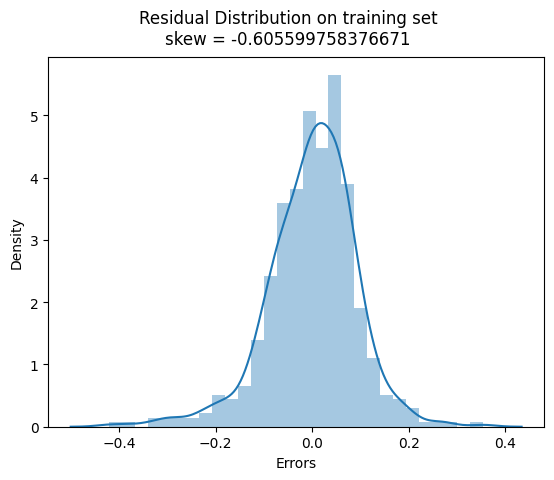

In [ ]:
# plotting residual
res = y_train - y_train_pred
skew = res.skew()
std_dev = res.std()
sns.distplot(res)
plt.suptitle('Residual Distribution on training set' + '\nskew = ' + str(skew))
plt.xlabel('Errors')
plt.show()

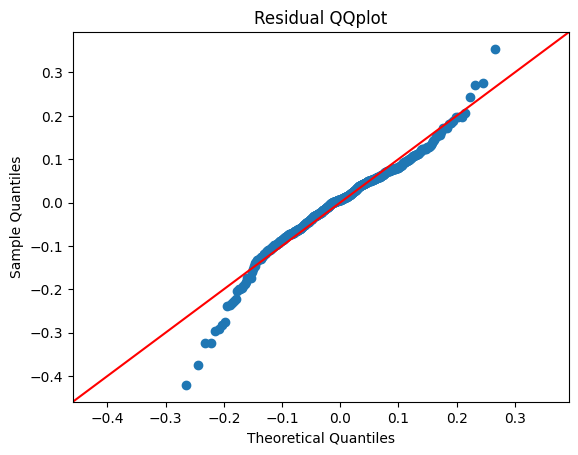

In [ ]:
# plotting the Q-Q plot of residual against normal distribution
fig = sm.qqplot(res, line='45', loc=0, scale=std_dev)
plt.title('Residual QQplot')
plt.savefig('Residual_QQplot')
plt.show()

From the plot we can visulize that the distribution of residuals is mostly normal.


## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.


In [ ]:
# rescaling the test data
# create a list of features to be scaled
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# scaling the data
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Precipitation,Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,False,False,False,...,False,False,True,False,False,False,False,False,False,True
535,1,0,1,0.842587,0.610133,0.153728,0.712034,False,True,False,...,False,False,False,False,False,False,False,True,False,False
299,0,0,1,0.496145,0.837699,0.334206,0.303382,False,False,True,...,True,False,False,False,False,True,False,False,False,True
221,0,0,1,0.795343,0.437098,0.339570,0.547400,False,False,False,...,False,False,False,False,False,False,False,True,False,False
152,0,0,1,0.741471,0.314298,0.537414,0.569029,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [ ]:
# Making predictions using the last model

y_pred = lm_model.predict(X_test_lm_5)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.8051

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.


Text(0, 0.5, 'y_pred')

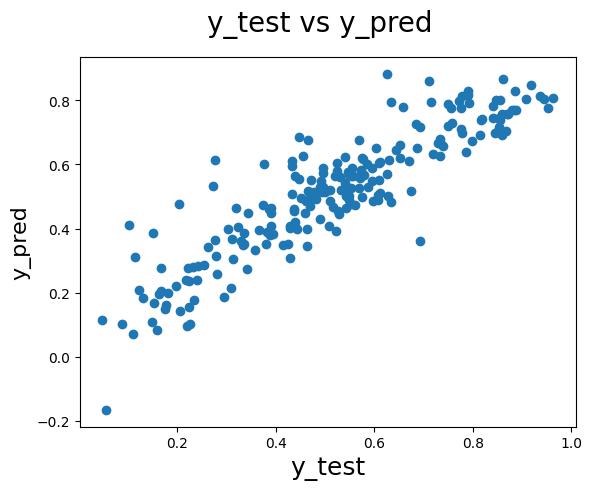

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [ ]:
round(lm_model.params, 4)

const                  0.2685
yr                     0.2358
holiday               -0.0944
atemp                  0.4450
windspeed             -0.1347
Spring                -0.1079
Winter                 0.0351
January               -0.0427
July                  -0.0646
September              0.0610
Light Precipitation   -0.2834
Mist + Cloudy         -0.0807
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2685 \times const + 0.2385 \times yr - 0.0944 \times holiday + 0.4450 \times atemp - 0.1347 \times windspeed - 0.1079 \times Spring + 0.0351 \times Winter - 0.0427 \times January - 0.0646 \times July + 0.0610 \times Septermber - 0.2834 \times Light Precipitation - 0.0807 \times "Mist + Cloudy" $


Overall we have a decent model, but we also acknowledge that we could do better.


In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(
    1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 4)
print(adjusted_r2)

0.7948


In [ ]:
print(y_pred)

184     0.35994
535    0.858611
299    0.398666
221    0.576707
152    0.526081
         ...   
400    0.385326
702    0.729106
127      0.5161
640    0.755508
72     0.280947
Length: 219, dtype: object


In [ ]:
y_pred = pd.to_numeric(y_pred, errors='coerce')

In [ ]:
print(y_pred)

184    0.359940
535    0.858611
299    0.398666
221    0.576707
152    0.526081
         ...   
400    0.385326
702    0.729106
127    0.516100
640    0.755508
72     0.280947
Length: 219, dtype: float64


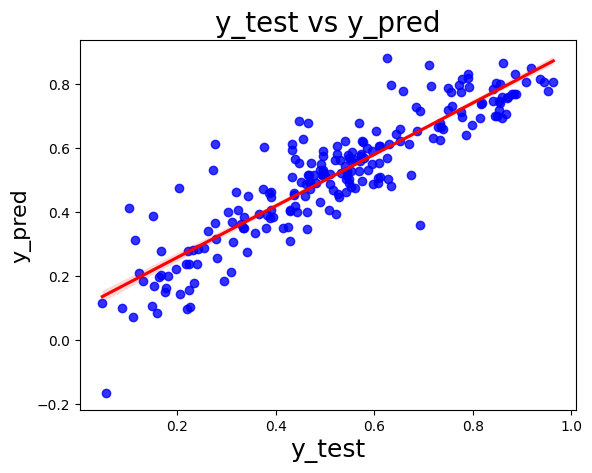

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={
            "color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Certainly! Let’s analyze the comparison between the training and testing datasets based on the R-squared values:

- Train dataset R^2 : 0.831
- Test dataset R^2 : 0.791
- Train dataset Adjusted R^2 : 0.828
- Test dataset Adjusted R^2 : 0.7948

Now, let’s discuss the predictors that significantly impact bike demand:

Predictors Influencing Bike Demand:
Year (yr)
Holiday status
“Feels Like” Temperature (atemp)
Wind speed
Winter season
January (month)
September (month)
Light precipitation
Mist + Cloudy weather conditions
